# Online Retail Data Clustering Porfolio Project

## Additional Variable Information
1. InvoiceNo: Invoice numberr. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
2. StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
3. Description: Product (item) name. Nominal. 
4. Quantity: The quantities of each product (item) per transaction. Numeric.	
5. InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
6. UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 
7. CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
8. Country: Country name. Nominal. The name of the country where a customer resides.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting the format for the numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Setting to show all columns in the DataFrame
pd.set_option('display.max_columns', 999)


## Exploratory Data Analysis

In [2]:
df = pd.read_excel('data/online_retail_II.xlsx', sheet_name= 0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,538171,22824,3 TIER SWEETHEART GARDEN SHELF,1,2010-12-09 20:01:00,35.95,17530.00,United Kingdom
1,538171,21260,FIRST AID TIN,3,2010-12-09 20:01:00,3.25,17530.00,United Kingdom
2,538171,22557,PLASTERS IN TIN VINTAGE PAISLEY,1,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
3,538171,22555,PLASTERS IN TIN STRONGMAN,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
4,538171,22556,PLASTERS IN TIN CIRCUS PARADE,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
5,538171,22551,PLASTERS IN TIN SPACEBOY,4,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
6,538171,22553,PLASTERS IN TIN SKULLS,6,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
7,538171,22151,PLACE SETTING WHITE HEART,11,2010-12-09 20:01:00,0.42,17530.00,United Kingdom
8,538171,20766,GARDEN PATH SKETCHBOOK,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
9,538171,21591,COSY HOUR CIGAR BOX MATCHES,4,2010-12-09 20:01:00,1.25,17530.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [5]:
df.describe(include = 'O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
225,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
226,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
227,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
228,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
229,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
313,538154,21035,SET/2 RED RETROSPOT TEA TOWELS,1,2010-12-09 16:35:00,5.91,NaN,United Kingdom
314,538154,21154,RED RETROSPOT OVEN GLOVE,1,2010-12-09 16:35:00,3.36,NaN,United Kingdom
315,538154,21189,WHITE HONEYCOMB PAPER GARLAND,3,2010-12-09 16:35:00,3.36,NaN,United Kingdom
316,538154,21558,SKULL LUNCH BOX WITH CUTLERY,1,2010-12-09 16:35:00,5.06,NaN,United Kingdom
317,538154,21874,GIN AND TONIC MUG,1,2010-12-09 16:35:00,3.36,NaN,United Kingdom


In [7]:
df[df["Quantity"]< 0].head(10)  

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C538164,35004B,SET OF 3 BLACK FLYING DUCKS,-1,2010-12-09 17:32:00,1.95,14031.00,United Kingdom
225,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
226,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
228,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
229,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
762,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
763,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
764,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom
765,C538123,22331,WOODLAND PARTY BAG + STICKER SET,-1,2010-12-09 15:41:00,1.65,12605.00,Germany
766,C538123,22333,RETROSPOT PARTY BAG + STICKER SET,-1,2010-12-09 15:41:00,1.65,12605.00,Germany


In [8]:
df.groupby("Description").agg({"Quantity": lambda x: x.sum()}).sort_values("Quantity", ascending=False).head(10)

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925
60 TEATIME FAIRY CAKE CASES,36326
PACK OF 60 PINK PAISLEY CAKE CASES,31822
JUMBO BAG RED RETROSPOT,30727
SMALL POPCORN HOLDER,29500


In [9]:
df['Country'].nunique()

40

In [10]:
df['Country'].value_counts()

Country
United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Thailand                    76
Hong Kong                   76


In [11]:
df["Invoice"] = df["Invoice"].astype(str)   
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C538164,35004B,SET OF 3 BLACK FLYING DUCKS,-1,2010-12-09 17:32:00,1.95,14031.00,United Kingdom
762,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
763,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
764,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom
765,C538123,22331,WOODLAND PARTY BAG + STICKER SET,-1,2010-12-09 15:41:00,1.65,12605.00,Germany
...,...,...,...,...,...,...,...,...
525278,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
525279,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
525280,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
525281,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia


In [12]:
df["Invoice"].str.replace("[0-9]", "", regex= True).unique()

array(['', 'C', 'A'], dtype=object)

In [13]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
121988,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
249186,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
346056,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom


In [14]:
df["StockCode"] = df["StockCode"].astype(str)
df[df["StockCode"].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
39,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom
40,538171,47591B,SCOTTIES CHILDRENS APRON,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
81,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
82,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
83,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
...,...,...,...,...,...,...,...,...
525441,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
525446,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
525447,489436,84596L,BISCUITS SMALL BOWL LIGHT BLUE,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
525454,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom


In [ ]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['DOT', 'M', 'POST', 'DCGS0076', 'C2', 'D', 'AMAZONFEE', 'S',
       'BANK CHARGES', 'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_20',
       'DCGS0003', 'PADS', 'gift_0001_10', 'gift_0001_30', 'SP1002',
       'DCGS0062', 'DCGS0058', 'gift_0001_40', 'DCGS0069', 'B',
       'DCGS0004', 'gift_0001_50', 'TEST001', 'C3', 'gift_0001_70',
       'gift_0001_80', 'gift_0001_60', 'gift_0001_90', '47503J ',
       'ADJUST2', 'DCGS0037', 'm', 'DCGS0041', 'ADJUST', 'DCGS0070',
       'DCGS0075', 'DCGSLGIRL', 'DCGS0053', 'DCGSLBOY', 'GIFT',
       'DCGS0059', 'DCGS0056', 'DCGS0060', 'DCGS0039', 'DCGS0036',
       'DCGS0016', 'DCGS0027', 'DCGS0006', 'DCGS0068', 'TEST002',
       'DCGS0066N', 'DCGS0072', 'DCGS0044'], dtype=object)

### Notes

#### Stock Code

- `StockCode` is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`
  - Also contains other values:

    | Code             | Description                                                                                   | Action                  |
    |------------------|-----------------------------------------------------------------------------------------------|-------------------------|
    | DCGS             | Looks valid, some quantities are negative though and customer ID is null                      | Exclude from clustering |
    | D                | Looks valid, represents discount values                                                       | Exclude from clustering |
    | DOT              | Looks valid, represents postage charges                                                       | Exclude from clustering |
    | M or m           | Looks valid, represents manual transactions                                                   | Exclude from clustering |
    | C2               | Carriage transaction – not sure what this means                                               | Exclude from clustering |
    | C3               | Not sure, only 1 transaction                                                                  | Exclude                 |
    | BANK CHARGES or B| Bank charges                                                                                  | Exclude from clustering |
    | S                | Samples sent to customer                                                                      | Exclude from clustering |
    | TESTXXX          | Testing data, not valid                                                                       | Exclude from clustering |
    | gift__XXX        | Purchases with gift cards, might be interesting for another analysis, but no customer data    | Exclude                 |
    | PADS             | Looks like a legit stock code for padding                                                     | Include                 |
    | SP1002           | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing         | Exclude for now         |
    | AMAZONFEE        | Looks like fees for Amazon shipping or something                                              | Exclude for now         |
    | ADJUSTX          | Looks like manual account adjustments by admins                                               | Exclude for now         |

## Data Preparation

In [16]:
cleaned_df = df.copy()

mask = (
        cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,538171,22824,3 TIER SWEETHEART GARDEN SHELF,1,2010-12-09 20:01:00,35.95,17530.00,United Kingdom
1,538171,21260,FIRST AID TIN,3,2010-12-09 20:01:00,3.25,17530.00,United Kingdom
2,538171,22557,PLASTERS IN TIN VINTAGE PAISLEY,1,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
3,538171,22555,PLASTERS IN TIN STRONGMAN,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
4,538171,22556,PLASTERS IN TIN CIRCUS PARADE,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
525457,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
525458,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
525459,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [17]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype(str)

mask = (
        (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,538171,22824,3 TIER SWEETHEART GARDEN SHELF,1,2010-12-09 20:01:00,35.95,17530.00,United Kingdom
1,538171,21260,FIRST AID TIN,3,2010-12-09 20:01:00,3.25,17530.00,United Kingdom
2,538171,22557,PLASTERS IN TIN VINTAGE PAISLEY,1,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
3,538171,22555,PLASTERS IN TIN STRONGMAN,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
4,538171,22556,PLASTERS IN TIN CIRCUS PARADE,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
525457,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
525458,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
525459,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [18]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

C:\Users\phunh.DESKTOP-8S8LTG6\AppData\Local\Temp\ipykernel_20952\1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [19]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [20]:
len(cleaned_df[cleaned_df["Price"]== 0])
# There are legit transactions (maybe there were gifted items or free samples). Drop as length is small


28

In [21]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572096,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [23]:
len(cleaned_df)/len(df)

0.7732429238325965

#### Dropped approximatedly 22.7% of records

## Feature Engineering 


In [24]:
cleaned_df["SalesTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df

C:\Users\phunh.DESKTOP-8S8LTG6\AppData\Local\Temp\ipykernel_20952\2640590818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesTotal
0,538171,22824,3 TIER SWEETHEART GARDEN SHELF,1,2010-12-09 20:01:00,35.95,17530.00,United Kingdom,35.95
1,538171,21260,FIRST AID TIN,3,2010-12-09 20:01:00,3.25,17530.00,United Kingdom,9.75
2,538171,22557,PLASTERS IN TIN VINTAGE PAISLEY,1,2010-12-09 20:01:00,1.65,17530.00,United Kingdom,1.65
3,538171,22555,PLASTERS IN TIN STRONGMAN,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom,3.30
4,538171,22556,PLASTERS IN TIN CIRCUS PARADE,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...
525456,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
525457,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
525458,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60
525459,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [25]:
aggregated_df = cleaned_df.groupby("Customer ID", as_index= False) \
    .agg(
        Monetary=("SalesTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df

,Customer ID,Monetary,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00
4281,18284.00,411.68,1,2010-10-04 11:33:00
4282,18285.00,377.00,1,2010-02-17 10:24:00
4283,18286.00,1246.43,2,2010-08-20 11:57:00


In [26]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df.head()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


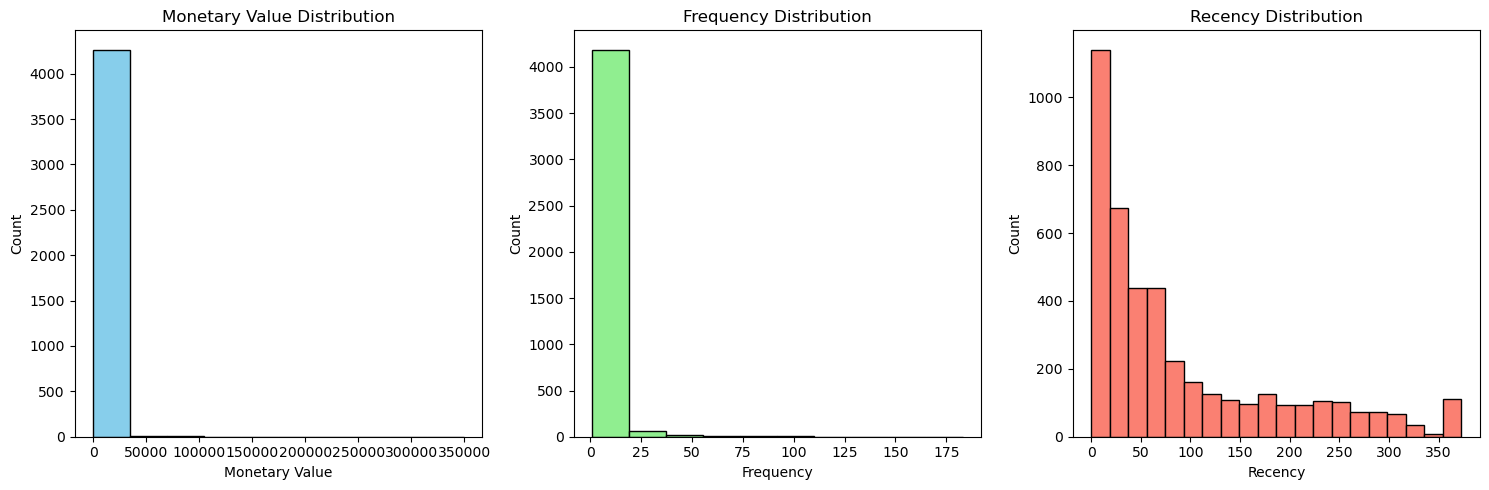

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['Monetary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

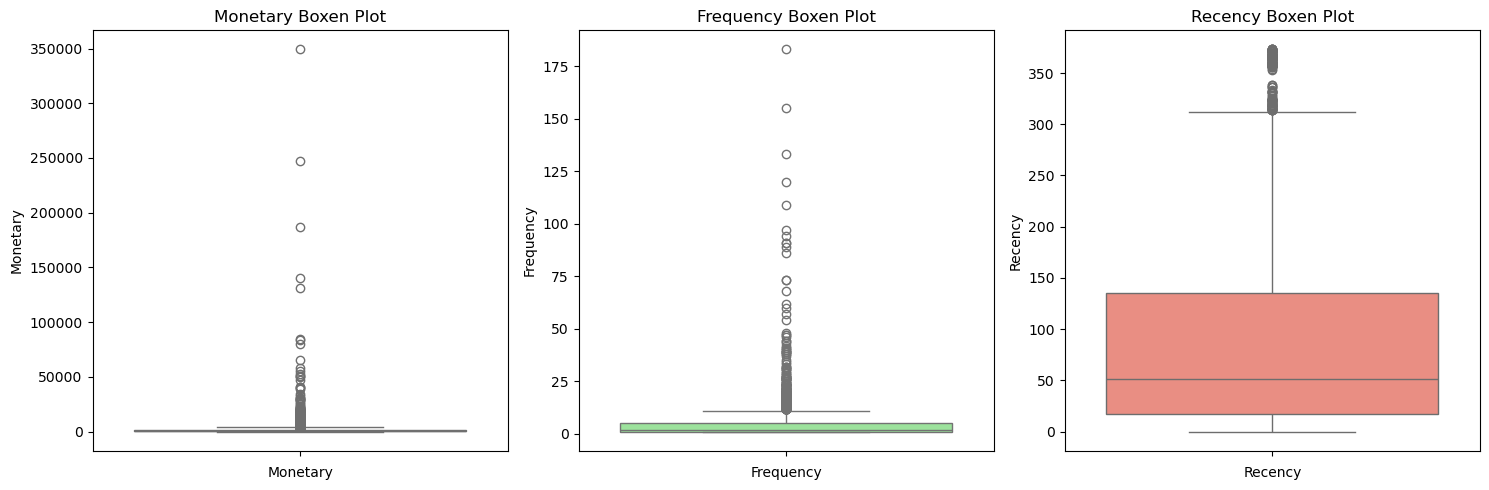

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['Monetary'], color='skyblue')
plt.title('Monetary Boxen Plot')
plt.xlabel('Monetary')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxen Plot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxen Plot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


In [29]:
Monetary_Q1 = aggregated_df['Monetary'].quantile(0.25)
Monetary_Q3 = aggregated_df['Monetary'].quantile(0.75)
Monetary_IQR = Monetary_Q3 - Monetary_Q1

Monetary_outliers_df = aggregated_df[(aggregated_df['Monetary'] > (Monetary_Q3 + 1.5 * Monetary_IQR)) | (aggregated_df['Monetary'] < (Monetary_Q1 - 1.5 * Monetary_IQR))].copy()

Monetary_outliers_df.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [30]:
Frequency_Q1 = aggregated_df['Frequency'].quantile(0.25)
Frequency_Q3 = aggregated_df['Frequency'].quantile(0.75)
Frequency_IQR = Frequency_Q3 - Frequency_Q1

Frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (Frequency_Q3 + 1.5 * Frequency_IQR)) | (aggregated_df['Frequency'] < (Frequency_Q1 - 1.5 * Frequency_IQR))].copy()

Frequency_outliers_df.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [31]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(Monetary_outliers_df.index)) & (~aggregated_df.index.isin(Frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


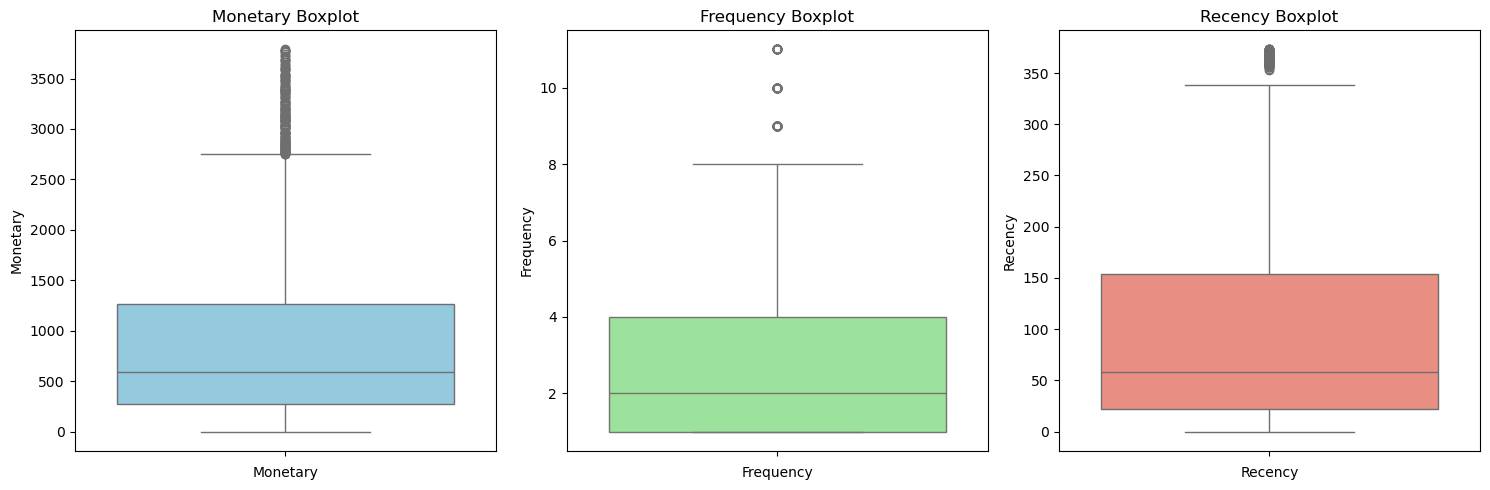

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['Monetary'], color='skyblue')
plt.title('Monetary Boxplot')
plt.xlabel('Monetary')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

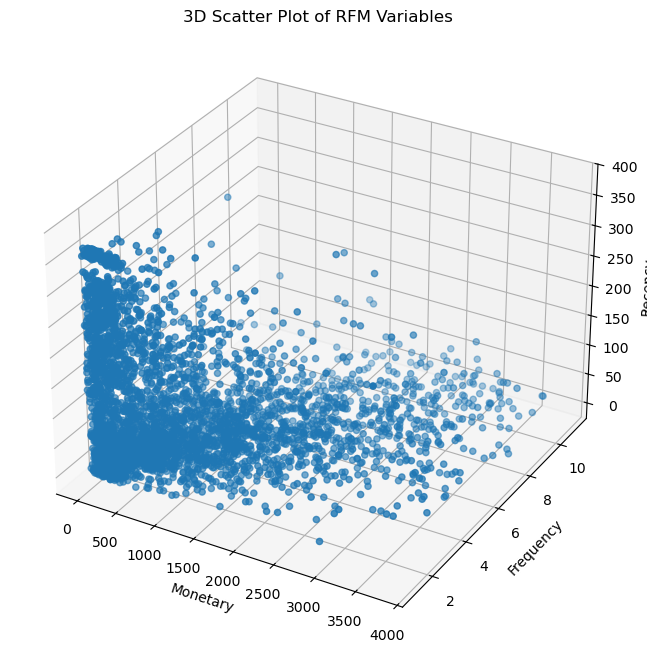

In [33]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(non_outliers_df['Monetary'], non_outliers_df['Frequency'], non_outliers_df['Recency'])

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of RFM Variables')

plt.show()
                     

In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['Monetary', 'Frequency', 'Recency']])

scaled_data_df = pd.DataFrame(scaled_data, index =non_outliers_df.index, columns=['Monetary', 'Frequency', 'Recency'])

scaled_data_df

,Monetary,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


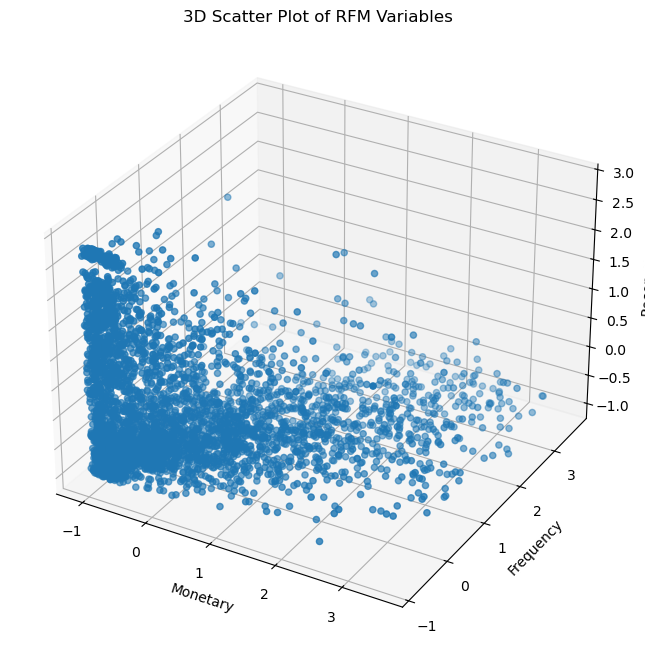

In [35]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df['Monetary'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of RFM Variables')
plt.show()


## KMeans Clustering

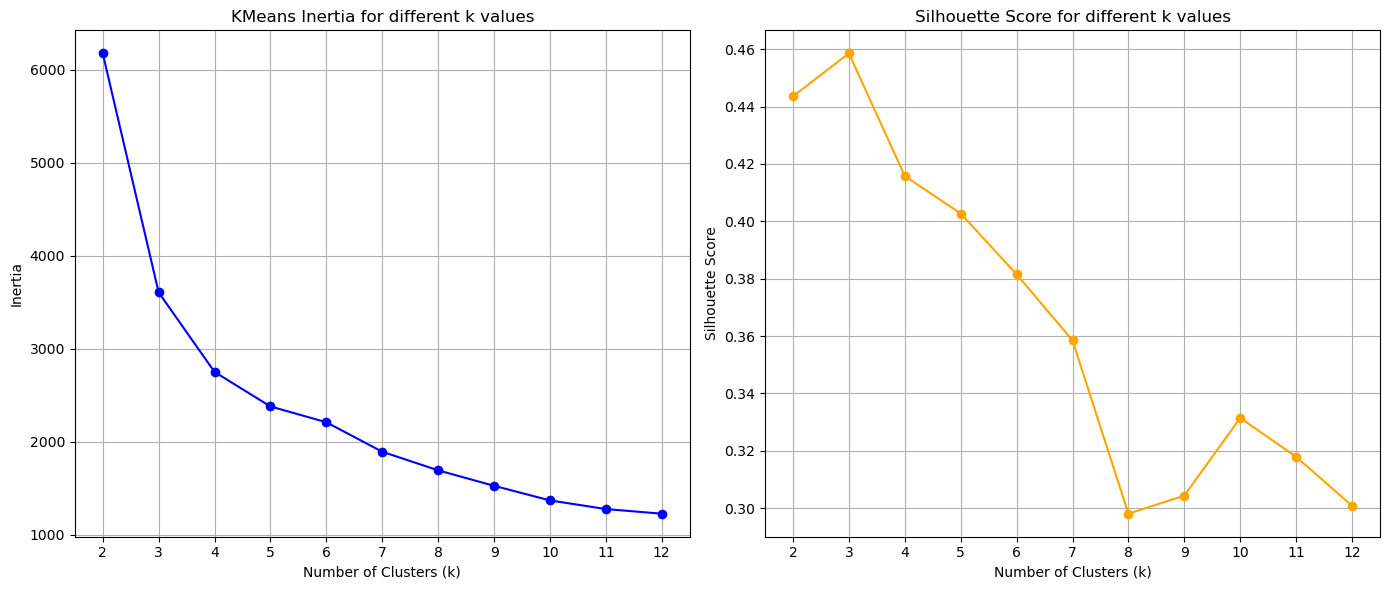

In [36]:
max_k = 12 

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    k_means = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = k_means.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels) 
    silhouette_scores.append(sil_score)  
    inertia.append(k_means.inertia_)  

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', color='blue')
plt.title('KMeans Inertia for different k values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for different k values')    
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


### Determining the Optimal Number of Clusters (k)

To identify the most appropriate number of clusters for our K-Means model, we applied two well-established evaluation techniques: the **Elbow Method** and **Silhouette Analysis**. We tested values of *k* from 2 to 12 and analyzed the results using the following metrics:

---

### Elbow Method – Inertia Plot

The **inertia** measures the internal coherence of clusters. Lower values indicate tighter, more compact clusters. In the inertia plot, we observed a significant drop in inertia from **k = 2 to k = 4**, after which the curve began to flatten. This pattern suggests the "elbow" point at **k = 4**, indicating that increasing the number of clusters beyond this value yields only marginal improvement in cluster compactness.

> **Insight:** The elbow at **k = 4** represents a good trade-off between model complexity and performance, avoiding overfitting while maintaining tight clusters.

---

### Silhouette Score Analysis

The **silhouette score** quantifies how well-separated the clusters are. It ranges from -1 to 1, where higher values indicate better-defined clusters. While the highest silhouette score was observed at **k = 3**, the score at **k = 4** remained reasonably high (approximately **0.42**).

> **Insight:** Although *k = 3* had the highest silhouette score, choosing *k = 4* provided more nuanced segmentation while still maintaining strong inter-cluster separation.

---

### Final Decision: k = 4

Considering both metrics together:

- **Inertia** showed diminishing returns after *k = 4*.
- **Silhouette score** remained strong at *k = 4*.
- **Business logic** or segmentation needs might benefit from finer categorization than just 3 clusters.

Therefore, we selected **k = 4** as the optimal number of clusters, balancing compactness, separation, and interpretability.


In [37]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels


array([1, 0, 2, ..., 1, 0, 0])

In [38]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

C:\Users\phunh.DESKTOP-8S8LTG6\AppData\Local\Temp\ipykernel_20952\395619450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


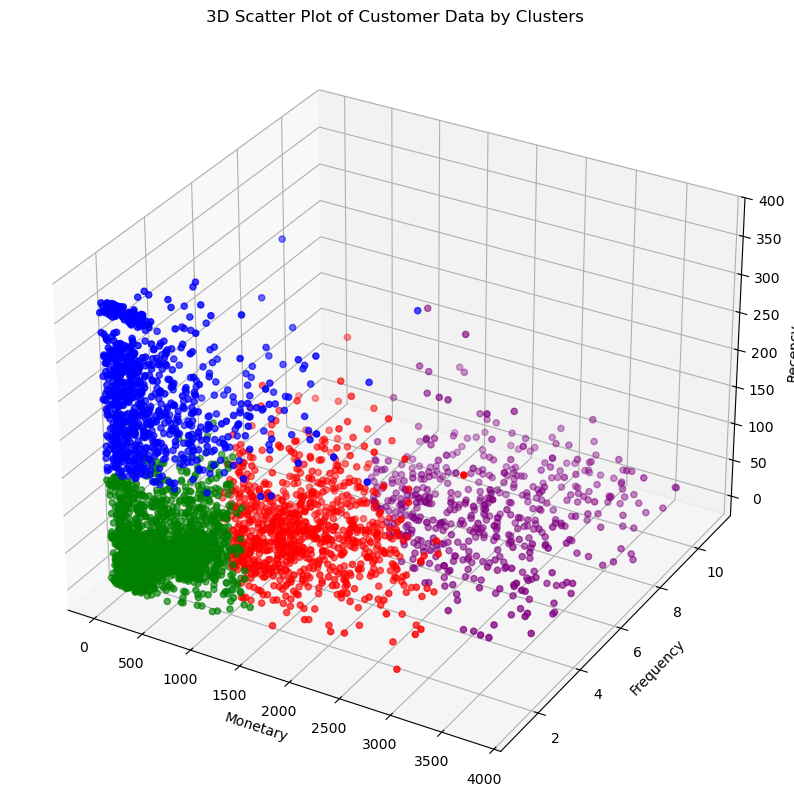

In [39]:
cluster_colors = {0: 'red',
                  1: 'blue', 
                  2: 'green', 
                  3: 'purple'}

colors = non_outliers_df['Cluster'].map(cluster_colors) 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['Monetary'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c=colors, marker ='o')

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Clusters')

plt.show()


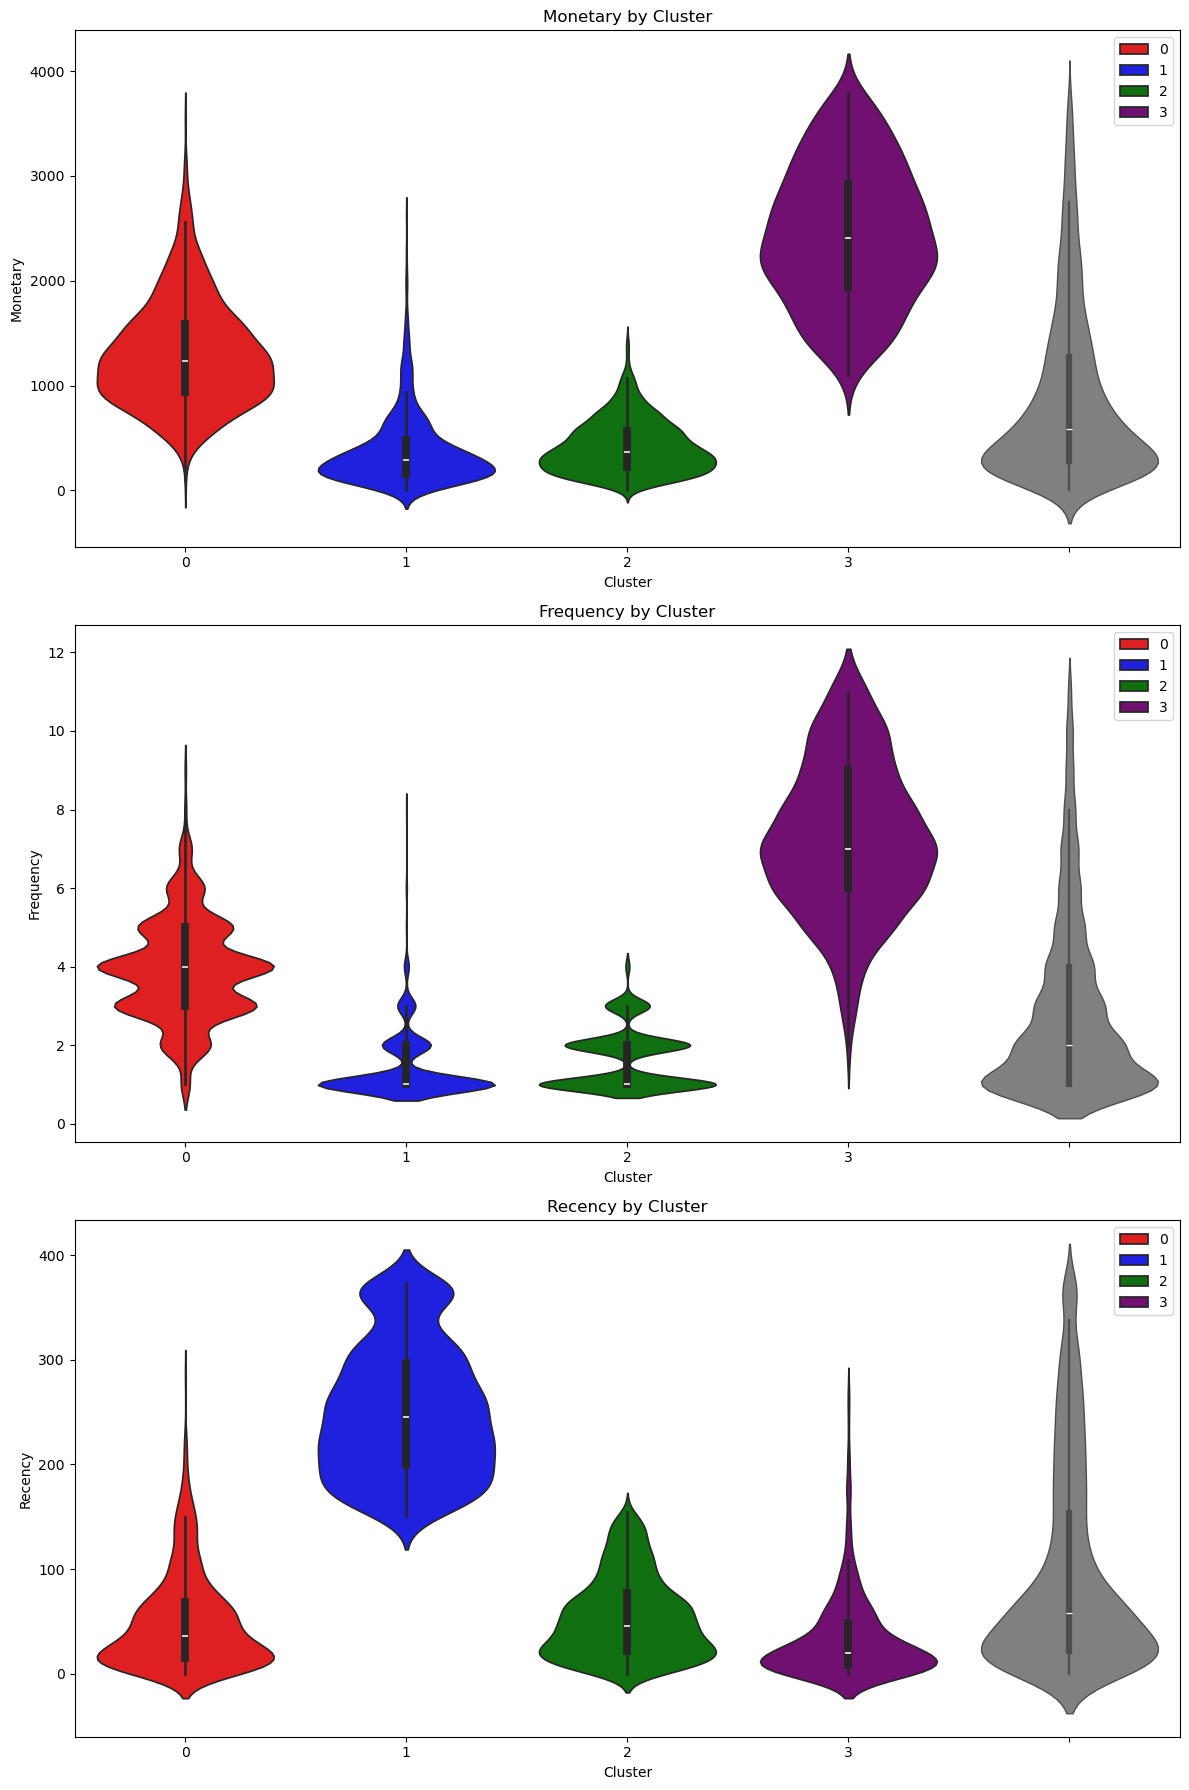

In [40]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Monetary'], palette=cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Monetary'], color='gray', linewidth=1.0)
plt.title('Monetary by Cluster')
plt.ylabel('Monetary')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

## Interpreation
### 1. Cluster 0 (Red): "Retain"

- **Rationale**: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.  
- **Action**: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

---

### 2. Cluster 1 (Blue): "Re-Engage"

- **Rationale**: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.  
- **Action**: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

---

### 3. Cluster 2 (Green): "Nurture"

- **Rationale**: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.  
- **Action**: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

---

### 4. Cluster 3 (Purple): "Reward"

- **Rationale**: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are our most valuable customers, and rewarding them is the way to maintain their engagement.
- **Action**: Implement robust loyalty programs, provide exclusive offers and deals, and recognize their loyalty to keep them satisfied. 

### **Summary of Cluster Names**:
- **Cluster 0 (Blue)**: "Retain"  
- **Cluster 1 (Orange)**: "Re-Engage"  
- **Cluster 2 (Green)**: "Nurture"  
- **Cluster 3 (Red)**: "Reward"



## Outlier Analysis

In [41]:
overlap_indices = Monetary_outliers_df.index.intersection(Frequency_outliers_df.index)
overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [42]:
monetary_only_outliers = Monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = Frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = Monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters_df

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [ ]:
outlier_cluster_colors = 
{ -1: '#9467bd', -2: '#8c564b', -3: '#e377c2' 
 }

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Monetary'], palette=outlier_cluster_colors, hue = outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Monetary'], color='gray', linewidth=1.0)
plt.title('Monetary by Cluster')
plt.ylabel('Monetary')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=outlier_cluster_colors, hue = outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=outlier_cluster_colors, hue = outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

- **Cluster -1 (Monetary Outliers) – PAMPER**  
  **Characteristics:** High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.  
  **Potential Strategy:** Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

- **Cluster -2 (Frequency Outliers) – UPSELL**  
  **Characteristics:** Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.  
  **Potential Strategy:** Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

- **Cluster -3 (Monetary & Frequency Outliers) – DELIGHT**  
  **Characteristics:** The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.  
  **Potential Strategy:** Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [46]:
cluster_labels = {
    -1: 'Monetary Outliers',
    -2: 'Frequency Outliers',
    -3: 'Monetary and Frequency Outliers',
    0: "Retain",
    1: "Re-engage",
    2: "Nurture",
    3: "Reward"
}

full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df['Cluster_Label'] = full_clustering_df['Cluster'].map(cluster_labels)
full_clustering_df

,Customer ID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster,Cluster_Label
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,Re-engage
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,Retain
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,Nurture
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,Retain
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,Nurture
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,Monetary and Frequency Outliers
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,Monetary and Frequency Outliers
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,Monetary and Frequency Outliers
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,Monetary and Frequency Outliers


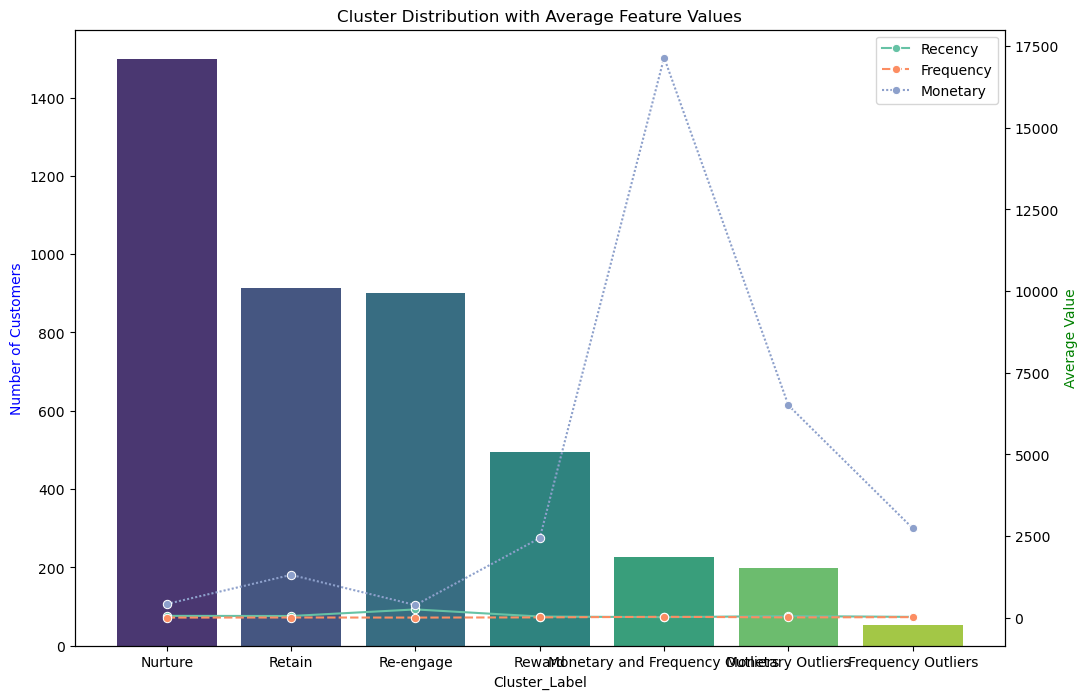

In [52]:
cluster_counts = full_clustering_df['Cluster_Label'].value_counts()
feature_means = full_clustering_df.groupby('Cluster_Label')[['Recency', 'Frequency', 'Monetary']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()